# Module 7: Machine Learning Project Notebook
- Author: Matthew Block
- [GitHub Project Repository](https://github.com/matthewpblock/datafun-07-ml)

In [34]:
import pandas as pd
from scipy import stats
import seaborn as sns

## Part 1 - Chart a Straight Line
Follow the instructions from 10.16 (starting page 414).

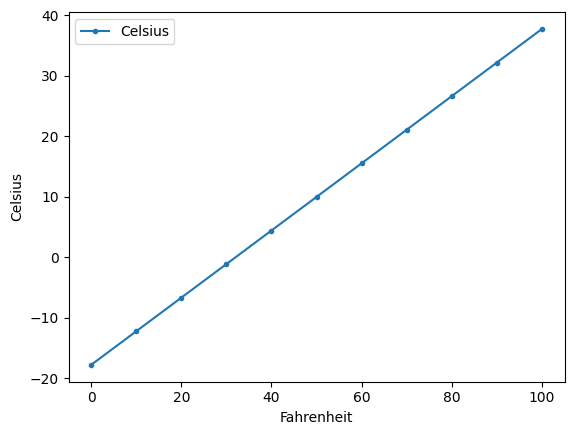

In [35]:
# Define the mathematical function
c = lambda f: 5/9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

# Graph the function
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition




In [36]:
# Follow the instructions to load NY City January high temperature from a csv file into a DataFrame.
# Recommended: Rather than nyc, name the dataframe nyc_df to reinforce the DataFrame operations.

# Load the data
nyc_df = pd.read_csv('ch10/ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection 


In [37]:
print(nyc_df.head())
print(nyc_df.tail())

print(nyc_df.Date.dtype)

     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3
int64


### Section 3 - Data Cleaning


In [38]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
print(nyc_df.head())

     Date  Temperature  Anomaly
0  189501         34.2     -3.2
1  189601         34.7     -2.7
2  189701         35.5     -1.9
3  189801         39.6      2.2
4  189901         36.4     -1.0


In [39]:
nyc_df.Date = nyc_df.Date.floordiv(100)
print(nyc_df.head())

   Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9
3  1898         39.6      2.2
4  1899         36.4     -1.0


### Section 4 - Descriptive Statistics 


In [40]:
pd.set_option('display.precision', 2)
print(nyc_df.describe())

          Date  Temperature  Anomaly
count   124.00       124.00   124.00
mean   1956.50        37.60     0.20
std      35.94         4.54     4.54
min    1895.00        26.10   -11.30
25%    1925.75        34.58    -2.82
50%    1956.50        37.60     0.20
75%    1987.25        40.60     3.20
max    2018.00        47.60    10.20


### Section 5 - Build the Model 

In [41]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
print(linear_regression.slope)
print(linear_regression.intercept)

0.014771361132966163
8.694993233674289


### Section 6 - Predict 

In [42]:
slope = linear_regression.slope
intercept = linear_regression.intercept

print (f'Predicted average temp for Jan 2024: {slope * 2024 + intercept} F')

Predicted average temp for Jan 2024: 38.5922281667978 F


### Section 7 - Visualizations 

(0.0, 70.0)

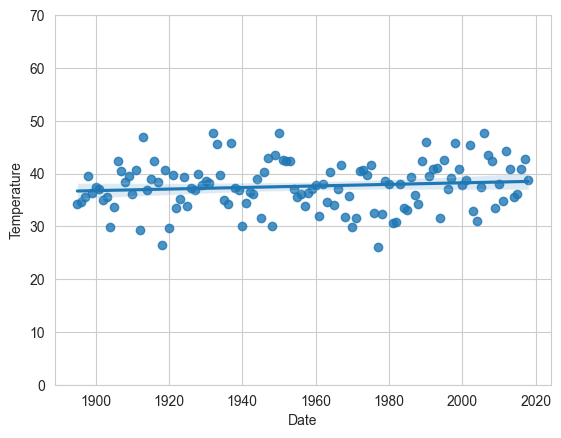

In [43]:
sns.set_style("whitegrid")
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(0, 70)